In [52]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
from src.loading import *
from src.saving import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
gsam_eofs = load_gsam_eofs_pcs()
gsam_p = load_gsam_reference_profiles().p.sel(z=gsam_eofs.components().z)
era5_eofs = load_era5_eofs_pcs()

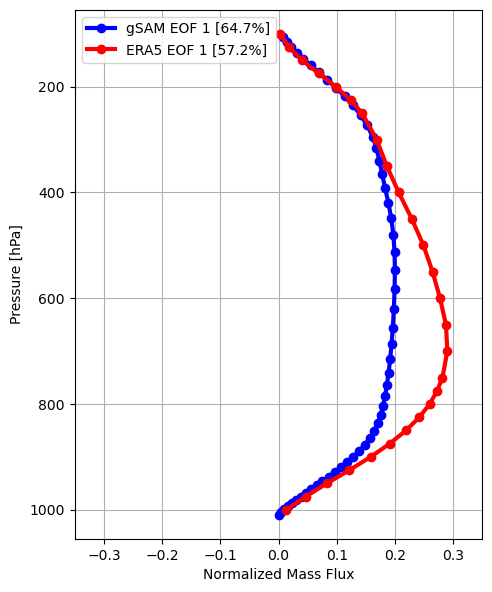

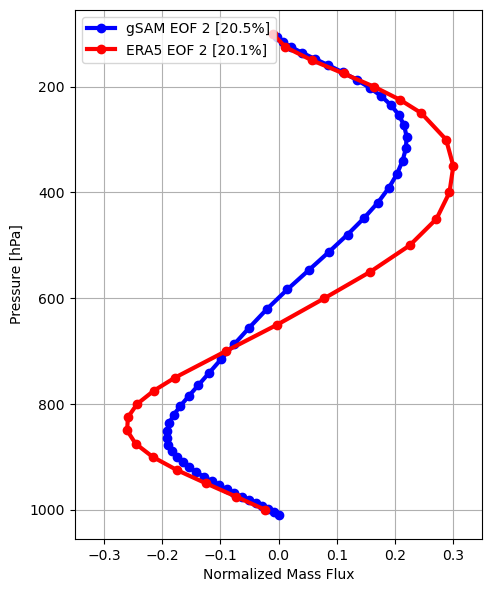

In [60]:

for mode in [1,2]:
    fig, ax = plt.subplots(figsize=(5, 6))
    
    # gSAM Plot
    #
    gsam_profile = gsam_eofs.components().sel(mode=mode)
    gsam_profile = gsam_profile.assign_coords({'p': gsam_p})
    gsam_exp_var = gsam_eofs.explained_variance_ratio().sel(mode=mode)
    gsam_profile.plot(ax=ax, y='p', label=f'gSAM EOF {mode} [{100*gsam_exp_var:0.1f}%]', color='blue', marker='o', lw=3)
    # ERA5 Plot
    #
    era5_profile = era5_eofs.components().sel(mode=mode)
    era5_exp_var = era5_eofs.explained_variance_ratio().sel(mode=mode)
    era5_profile.plot(ax=ax, y='level', label=f'ERA5 EOF {mode} [{100*era5_exp_var:0.1f}%]', color='red', marker='o', lw=3)

    ax.invert_yaxis()
    ax.legend(loc='upper left')
    ax.set_xlim(-0.35, 0.35)
    ax.grid()
    ax.set_title(None)
    ax.set_xlabel('Normalized Mass Flux')
    ax.set_ylabel('Pressure [hPa]')
    fig.tight_layout(pad=1)
    save_figure(fig, f'massflux_eof_mode{mode}.pdf')